(308, 288, 3)


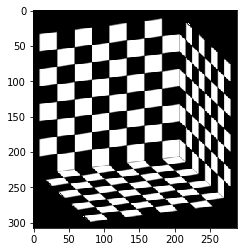

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
%matplotlib inline

image = cv2.imread('images/chessboard.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_copy = np.copy(image)
print(np.shape(image_copy))

plt.imshow(image_copy)


(308, 288)
(308, 288)


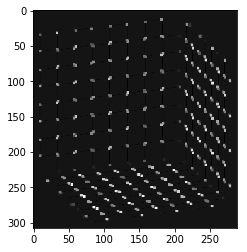

In [3]:
# Convert to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

# Convert to float type
gray = np.float32(gray)

# Detect corners
dst = cv2.cornerHarris(gray, 2, 3, 0.04)
print(np.shape(dst))
# dilate corner image to enhance corner points
dst = cv2.dilate(dst, None)
print(np.shape(dst))
plt.imshow(dst, cmap='gray')

Select and display strong corners

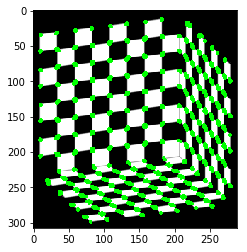

In [9]:
# Define a threshold for extracting strong corners
# This value may vary depending on the image
thresh = 0.01 * dst.max()

# create an image copy to draw corners on
corner_image = np.copy(image_copy)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if (dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle(corner_image, (i,j), 1, (0,255,0), 1)
            
plt.imshow(corner_image)

# Excercise

(536, 820, 3)


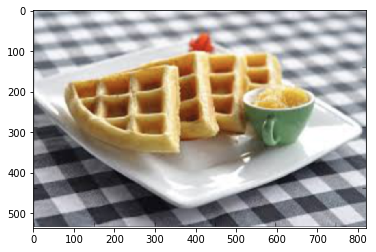

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
%matplotlib inline

waffle = cv2.imread('images/waffle.png')
waffle = cv2.cvtColor(waffle, cv2.COLOR_BGR2RGB)
print(np.shape(waffle))
plt.imshow(waffle)

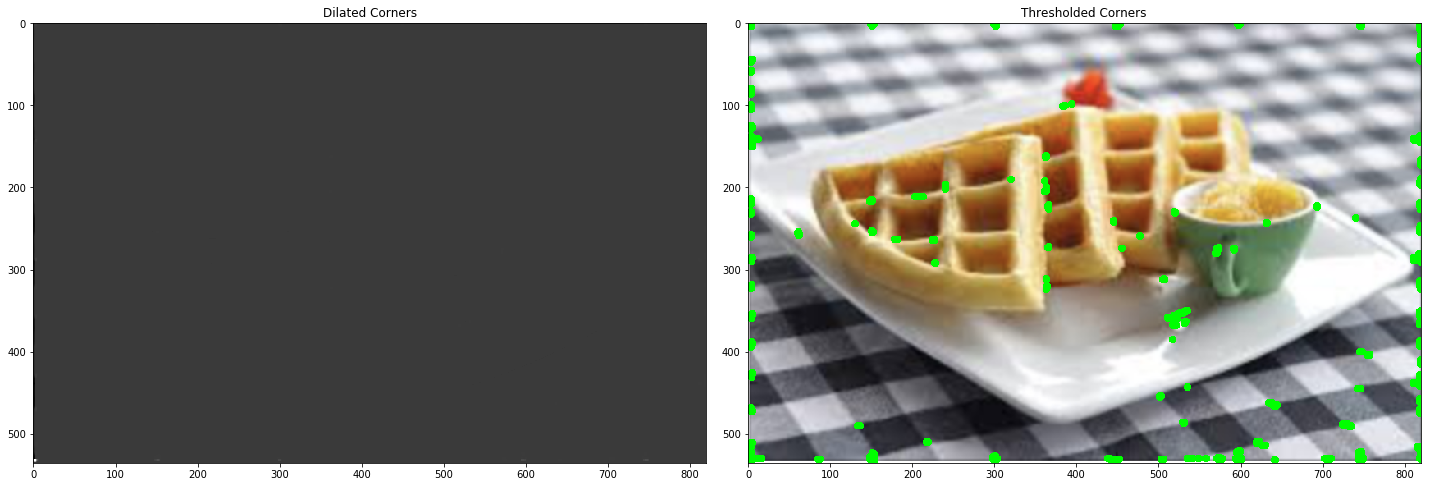

In [16]:
# ---------------------------------------------------------- #


## TODO: Complete this corner detection function
## This takes in an image
## And returns dilated corners
def corner_detect(image):
    # Convert the image to grayscale, floating point values
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    gray = np.float32(gray)
    
    ## TODO: Create a Harris corner detector using those grayscale vals
    ## Change this value, but keep the variable name
    corners = cv2.cornerHarris(gray, 2, 3, 0.04)
    
    ## TODO: Dilate the corner detections
    #kernel = np.ones((5,5), np.uint8)
    corners = cv2.dilate(corners, None)
    
    # Return those values
    return corners

# Runs your function (do not change this line of code)
corners = corner_detect(waffle)

## TODO: Define a threshold to select strong corners
threshold = 0.0001*corners.max()

# ---------------------------------------------------------- #
if(corners is not None):
    # Create an image copy to draw corners on
    corner_image = np.copy(waffle)

    # Iterate through all the corners and draw them on the image (if they pass the threshold)
    for j in range(0, corners.shape[0]):
        for i in range(0, corners.shape[1]):
            if(corners[j,i] > threshold):
                # image, center pt, radius, color, thickness
                cv2.circle(corner_image, (i, j), 2, (0,255,0), 2)      
                
    # Plot the result
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    f.tight_layout()
    ax1.imshow(corners, cmap='gray')
    ax1.set_title('Dilated Corners')
    ax2.imshow(corner_image, cmap='gray')
    ax2.set_title('Thresholded Corners')